In [6]:
import matplotlib



print(matplotlib.matplotlib_fname())

/Users/apple/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc


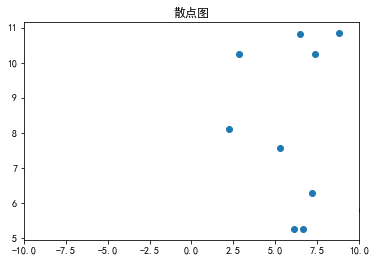

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = [u'SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

np.random.seed(1) #随机模式1号
x2, y2 = np.random.normal(loc=8
                          , scale=2.5
                          , size=(2,13))
plt.figure()
plt.scatter(x2, y2)
plt.title('散点图')
plt.xlim(-10, 10)
plt.show()

#### **sns.lmplot()**  
lmplot()是seaborn中最常用的函数之一，我们用它来帮助我们绘制出数据点的最佳拟合线。

In [14]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = [u'SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

%matplotlib inline

In [15]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

In [16]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [17]:
df.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')

In [18]:
name = ["汽车制造商","型号名称","发动机排量(L)","制造年份","气缸数量","手动/自动"
              ,"驱动类型","城市里程/加仑","公路里程/加仑","汽油种类","车辆种类"]

#驱动类型：四轮，前轮，后轮
#能源种类：汽油，柴油，用电等等
#车辆种类：皮卡，SUV，小型，中型等等
#城市里程/加仑，公路里程/加仑：表示使用没加仑汽油能够跑的英里数，所以这个数值越大代表汽车越节能

In [19]:
[*zip(df.columns, name)]

[('manufacturer', '汽车制造商'),
 ('model', '型号名称'),
 ('displ', '发动机排量(L)'),
 ('year', '制造年份'),
 ('cyl', '气缸数量'),
 ('trans', '手动/自动'),
 ('drv', '驱动类型'),
 ('cty', '城市里程/加仑'),
 ('hwy', '公路里程/加仑'),
 ('fl', '汽油种类'),
 ('class', '车辆种类')]

### 4.绘制图像

In [21]:
df.loc[df.cyl.isin([4, 8]), :].head(10)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact
10,audi,a4 quattro,2.0,2008,4,auto(s6),4,19,27,p,compact
17,audi,a6 quattro,4.2,2008,8,auto(s6),4,16,23,p,midsize
18,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv


In [22]:
df.cyl.value_counts

<bound method IndexOpsMixin.value_counts of 0      4
1      4
2      4
3      4
4      6
5      6
6      6
7      4
8      4
9      4
10     4
11     6
12     6
13     6
14     6
15     6
16     6
17     8
18     8
19     8
20     8
21     8
22     8
23     8
24     8
25     8
26     8
27     8
28     8
29     8
      ..
204    6
205    6
206    6
207    4
208    4
209    4
210    4
211    6
212    4
213    4
214    4
215    4
216    4
217    5
218    5
219    6
220    6
221    4
222    4
223    4
224    4
225    5
226    5
227    4
228    4
229    4
230    4
231    6
232    6
233    6
Name: cyl, Length: 234, dtype: int64>

> **重要参数**  
>> height：图像的高度  
>> aspect：图像的纵横比，aspect * height = 每张图的长度  
>> palette：类似于matplotlib中的colormap，表示使用什么色板/光谱

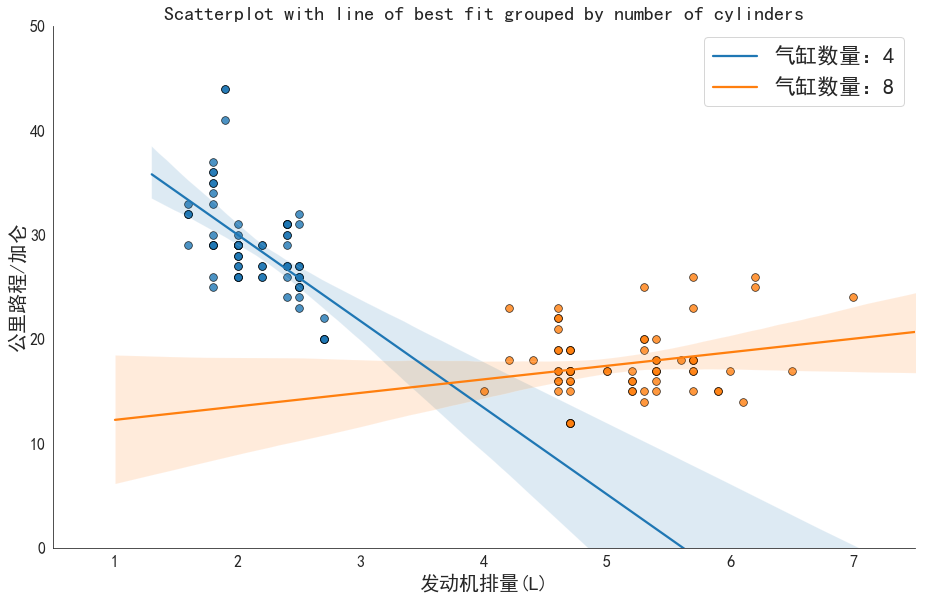

In [28]:
# 准备数据
df_select = df.loc[df.cyl.isin([4, 8]), :]

# 绘制图像
sns.set_style('white')
gridobj = sns.lmplot(x='displ', # 横坐标
                     y='hwy', # 纵坐标
                     hue='cyl',
                     data=df_select, # 输入数据
                     height=8,
                     aspect=1.6, # 横轴和纵轴比例
                     palette='tab10', # 色板
                     legend=False,
                     scatter_kws=dict(s=60, linewidths=0.7, edgecolors='black', )
                    )
#装饰图像
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.rcParams['font.sans-serif']=['Simhei']
plt.xlabel("发动机排量(L)",fontsize=20)
plt.ylabel("公里路程/加仑",fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(["气缸数量：4","气缸数量：8"], fontsize=22)
plt.title("Scatterplot with line of best fit grouped by number of cylinders", fontsize=20)

plt.show()

### 5. 让每个类型的散点显示在不同的图像上

>**重要参数**
>>  col：表示按照这个特征中的分类绘制图像，并且一个类别绘制一张图一条拟合线，排成一行  
>> col_wrap：当参数col有效的时候有效，表示每行最多显示col_wrap个图

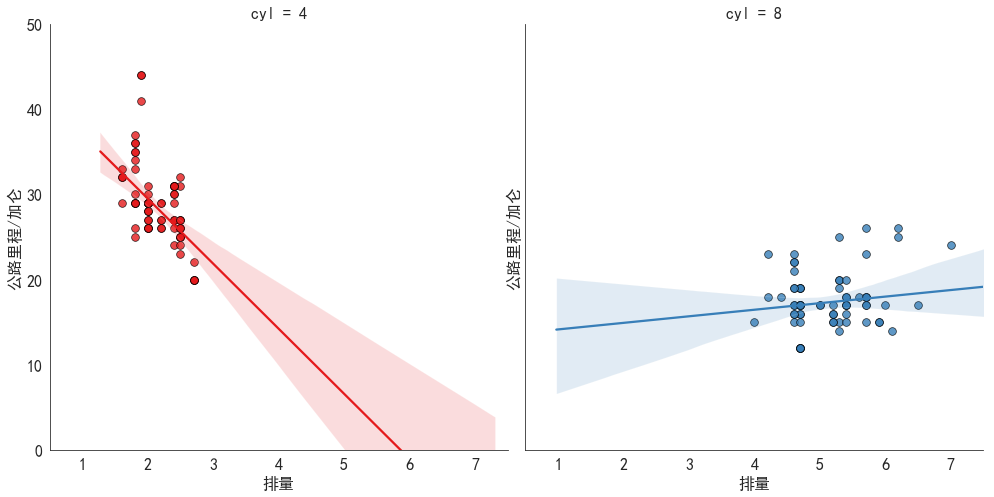

In [35]:
large = 22; med = 16; small = 12
params = {'axes.titlesize': large, #子图上的标题字体大小
          'legend.fontsize': med, #图例的字体大小
          'figure.figsize': (16, 10), #图像的画布大小
          'axes.labelsize': med, #标签的字体大小
          'xtick.labelsize': med, #x轴上的标尺的字体大小
          'ytick.labelsize': med, #y轴上的标尺的字体大小
          'figure.titlesize': large} #整个画布的标题字体大小
plt.rcParams.update(params) #设定各种各样的默认属性
gridobj = sns.lmplot(x='displ', 
                     y='hwy',
                     data=df_select,
#                      data=df,
                     hue='cyl',
                     height=7,
                     robust=True,
                     palette='Set1',
                     col="cyl", #表示按照这个特征中的分类绘制图像，并且一个类别使用一张图，一条直线
#                      col_wrap = 3, #表示对col中的类别数量进行折叠，让一行变成多行
                     scatter_kws=dict(s=60, linewidths=0.7, edgecolors='black')

                    )
#装饰图像
plt.rcParams['font.sans-serif']=['Simhei']
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50),xlabel="排量",ylabel="公路里程/加仑")
plt.show()

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

### 04 & 05/50 抖动的带状图与计数图

In [37]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

In [39]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [40]:
df.shape

(234, 11)

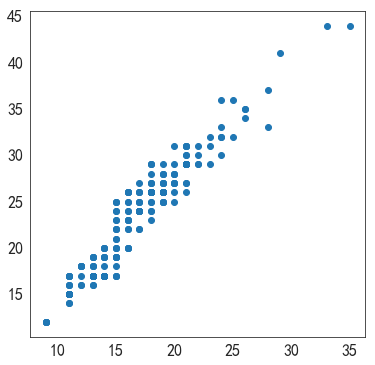

In [41]:
plt.figure(figsize=(6,6))
plt.scatter(df.cty,df.hwy);

In [42]:
df.loc[:, ['cty', 'hwy']]

,cty,hwy
0,18,29
1,21,29
2,20,31
3,21,30
4,16,26
5,18,26
6,18,27
7,18,26
8,16,25
9,20,28


有两种手段可以解决这个问题，抖动图与计数图，两种都使用我们的类stripplot来进行绘制

#### sns.stripplot()  
>重要参数  
>> jitter：抖动的幅度（即同一位置的两个点的距离大小），0表示完全不存在抖动

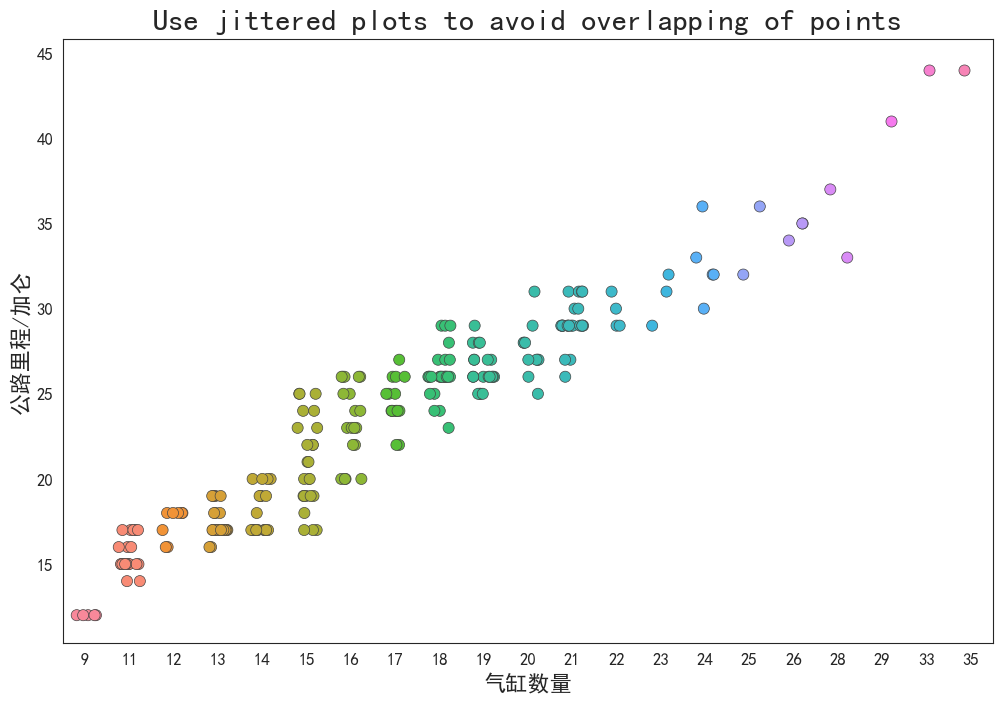

In [49]:
# 建立画布
fig, axes = plt.subplots(figsize=(12, 8), dpi=100)
# 用来绘画抖动图的函数：sns.stripplot
sns.stripplot(df.cty, df.hwy,
             jitter=0.25,
             size=8,
             ax=axes,
             linewidth=0.5,
             )

# Decorations
plt.title('Use jittered plots to avoid overlapping of points', fontsize=22)
plt.rcParams['font.sans-serif']=['Simhei']
plt.xlabel("气缸数量",fontsize=16)
plt.ylabel("公路里程/加仑",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### 计数图

In [65]:
df_counts = df.groupby(['hwy', 'cty']).size().reset_index(name='counts')
df_counts

,hwy,cty,counts
0,12,9,5
1,14,11,2
2,15,11,10
3,16,11,3
4,16,12,2
5,16,13,2
6,17,11,5
7,17,12,1
8,17,13,12
9,17,14,10


In [61]:
df.groupby(['hwy', 'cty']).size().head(20)

hwy  cty
12   9       5
14   11      2
15   11     10
16   11      3
     12      2
     13      2
17   11      5
     12      1
     13     12
     14     10
     15      3
18   12      5
     13      3
     14      1
     15      1
19   13      4
     14      4
     15      5
20   14      4
     15      3
dtype: int64

In [58]:
df.groupby(['hwy', 'cty']).count().head(20)

manufacturer  model  displ  year  cyl  trans  drv  fl  class
hwy cty                                                              
12  9               5      5      5     5    5      5    5   5      5
14  11              2      2      2     2    2      2    2   2      2
15  11             10     10     10    10   10     10   10  10     10
16  11              3      3      3     3    3      3    3   3      3
    12              2      2      2     2    2      2    2   2      2
    13              2      2      2     2    2      2    2   2      2
17  11              5      5      5     5    5      5    5   5      5
    12              1      1      1     1    1      1    1   1      1
    13             12     12     12    12   12     12   12  12     12
    14             10     10     10    10   10     10   10  10     10
    15              3      3      3     3    3      3    3   3      3
18  12              5      5      5     5    5      5    5   5      5
    13              3      3      3     3    3      3    3   3      3
    14              1      1      1     1    1      1    1   1      1
    15              1      1      1     1    1      1    1   1      1
19  13              4      4      4     4    4      4    4   4      4
    14              4      4      4     4    4      4    4   4      4
    15              5      5      5     5    5      5    5   5      5
20  14              4      4      4     4    4      4    4   4      4
    15              3      3      3     3    3      3    3   3      3
    16              4      4      4     4    4      4    4   4      4
21  15              2      2      2     2    2      2    2   2      2
22  15              3      3      3     3    3      3    3   3      3
    16              2      2      2     2    2      2    2   2      2
    17              2      2      2     2    2      2    2   2      2
23  15              2      2      2     2    2      2    2   2      2
    16              4      4      4     4    4      4    4   4      4
    18              1      1      1     1    1      1    1   1      1
24  15              2      2      2     2    2      2    2   2      2
    16              2      2      2     2    2      2    2   2      2
...               ...    ...    ...   ...  ...    ...  ...  ..    ...
27  21              2      2      2     2    2      2    2   2      2
28  18              1      1      1     1    1      1    1   1      1
    19              3      3      3     3    3      3    3   3      3
    20              3      3      3     3    3      3    3   3      3
29  18              3      3      3     3    3      3    3   3      3
    19              1      1      1     1    1      1    1   1      1
    20              1      1      1     1    1      1    1   1      1
    21             14     14     14    14   14     14   14  14     14
    22              2      2      2     2    2      2    2   2      2
    23              1      1      1     1    1      1    1   1      1
30  21              2      2      2     2    2      2    2   2      2
    22              1      1      1     1    1      1    1   1      1
    24              1      1      1     1    1      1    1   1      1
31  20              1      1      1     1    1      1    1   1      1
    21              4      4      4     4    4      4    4   4      4
    22              1      1      1     1    1      1    1   1      1
    23              1      1      1     1    1      1    1   1      1
32  23              1      1      1     1    1      1    1   1      1
    24              2      2      2     2    2      2    2   2      2
    25              1      1      1     1    1      1    1   1      1
33  24              1      1      1     1    1      1    1   1      1
    28              1      1      1     1    1      1    1   1      1
34  26              1      1      1     1    1      1    1   1      1
35  26              2      2      2     2    2      2    2   2      2
36  24             

In [71]:
df_counts.head()

,hwy,cty,counts
0,12,9,5
1,14,11,2
2,15,11,10
3,16,11,3
4,16,12,2


In [77]:
[*zip(df.columns.values, np.array(name))]

[('manufacturer', '汽车制造商'),
 ('model', '型号名称'),
 ('displ', '发动机排量(L)'),
 ('year', '制造年份'),
 ('cyl', '气缸数量'),
 ('trans', '手动/自动'),
 ('drv', '驱动类型'),
 ('cty', '城市里程/加仑'),
 ('hwy', '公路里程/加仑'),
 ('fl', '汽油种类'),
 ('class', '车辆种类')]

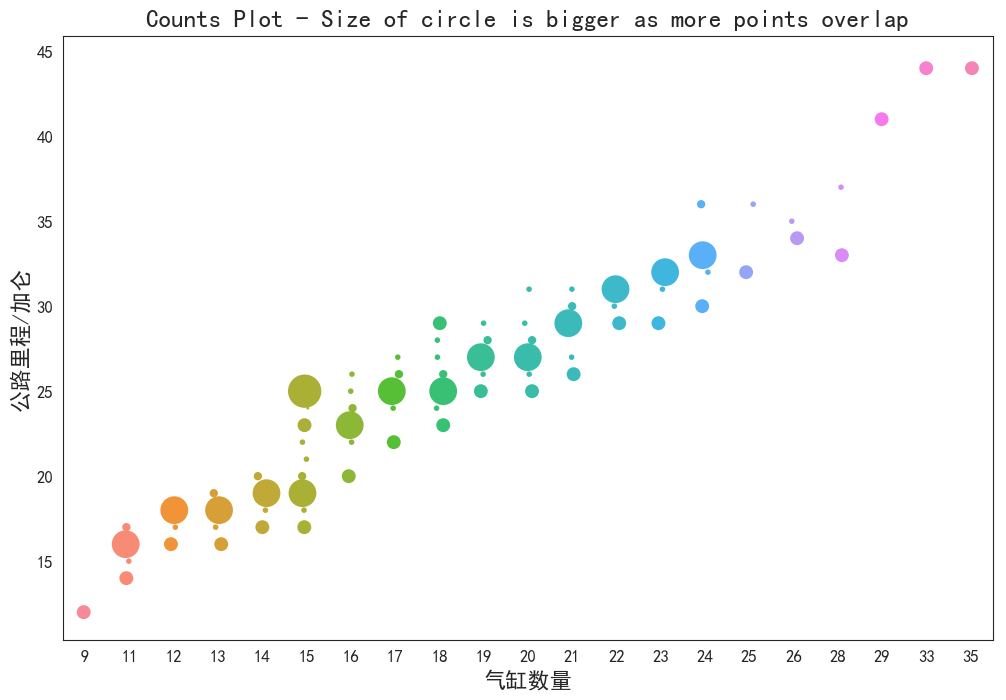

In [81]:
# 绘画计数图
fig, ax = plt.subplots(figsize=(12, 8), dpi=100)
sns.stripplot(df_counts.cty, 
                     df_counts.hwy, 
                     size=df_counts.counts*2,
                     ax=ax
                    )

#装饰
plt.title('Counts Plot - Size of circle is bigger as more points overlap', fontsize=18)
plt.rcParams['font.sans-serif']=['Simhei']
plt.xlabel("气缸数量",fontsize=16)
plt.ylabel("公路里程/加仑",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [82]:
ax